### En este caso aumentamos el error de lectura del calibrador, de 0.05 a 0.2 

In [3]:
import numpy as np

const = i_x - i_p     

i_x: corriente medida x el tester

i_p: corriente de referencia

In [4]:
i = [10.01, 10.00, 10.02, 10.01, 10.00]
i = np.array(i)

i_mean = i.mean()              #calculo valor medio
i_std = i.std(ddof = 1)        #calculo desvio estandar
n = len(i)

print(i_mean, i_std, n)

i_x = i_mean
i_p = 10

const = i_x - i_p
print("Error: %0.4f" %const)   #pedimos 4 decimales de un flout

10.008 0.008366600265340578 5
Error: 0.0080


In [5]:
# EVALUACION TIPO A

ui_x = i_std/np.sqrt(n)      #calculo incertidumbre tipo A
print("ui_x: %0.10f" %ui_x)

ui_p = 0                     # no hay tipo A del patrón, ya que no muestrea nada, le seteo el valor

ui_x: 0.0037416574


In [6]:
# EVALUACION TIPO B

e_lectura = 0.2             #error de lectura
e_bias = 2e-3               #error constante

#distribución Gaussiana y cobertura del 99%

error_ip = (e_lectura/100)*i_p + e_bias      #calculo error del patrón
print("Error del patron: %0.4f" %error_ip)

uj_p = error_ip/3                            #calculo incertidumbre tipo B
print("uj_p: %0.10f" %uj_p)                  #se divide por 3 por el 99% de cobertura 
                                             #(ver tabla de distribución normal --> 3 sigmas)

# En realidad, segun la tabla el valor exacto por el que habráia que divir
# es 2.575

uj_x = 0              # el tester no tiene incertidumbre Tipo B

Error del patron: 0.0220
uj_p: 0.0073333333


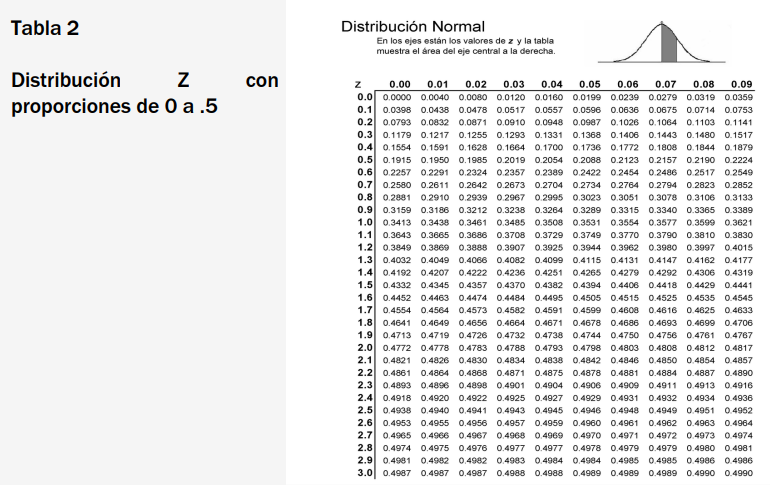

In [7]:
# INCERTIDUMBRES COMBINADAS

#instrumento a calibrar
uc_x = np.sqrt(ui_x**2 + uj_p**2)

print("uc_x: %0.10f" %uc_x)
print("El valor de c es", const, "con incertidumbre uc", uc_x)

uc_x: 0.0082327260
El valor de c es 0.007999999999999119 con incertidumbre uc 0.008232726023485609


In [8]:
# GRADOS EFECTIVOS DE LIBERTAD

v_eff = (uc_x**4) / (ui_x**4/(n-1))       #calculo grados efectivos de libertad 
print("Grados de libertad: %d" %v_eff)    #lo casteamos a entero
                      
#vemos que la incertidumbre combinada está dominada por la tipo B, ya que el 
# valor obtenido (93) se parece más a la tipo B que a la tipo A

Grados de libertad: 93


In [9]:
# INCERTIDUMBRE EXPANDIDA

#Con más de 30 grados de libertad tengo distribución normal  
#(a partir de 30 grados ya se toma como normal --> domina B)

#El coeficiente K lo obtengo de la tabla de student (ver en PPT).
#En la tabla vas a la columna de  95.45 y la entrada de 100 grados de libertad,
#obteniendo K = 2

k = 2

U = k * uc_x    #incertidumbre expandida

print("El valor de c es", const, "con incertidumbre U", U, "con una confianza del 95.45%")

El valor de c es 0.007999999999999119 con incertidumbre U 0.016465452046971217 con una confianza del 95.45%


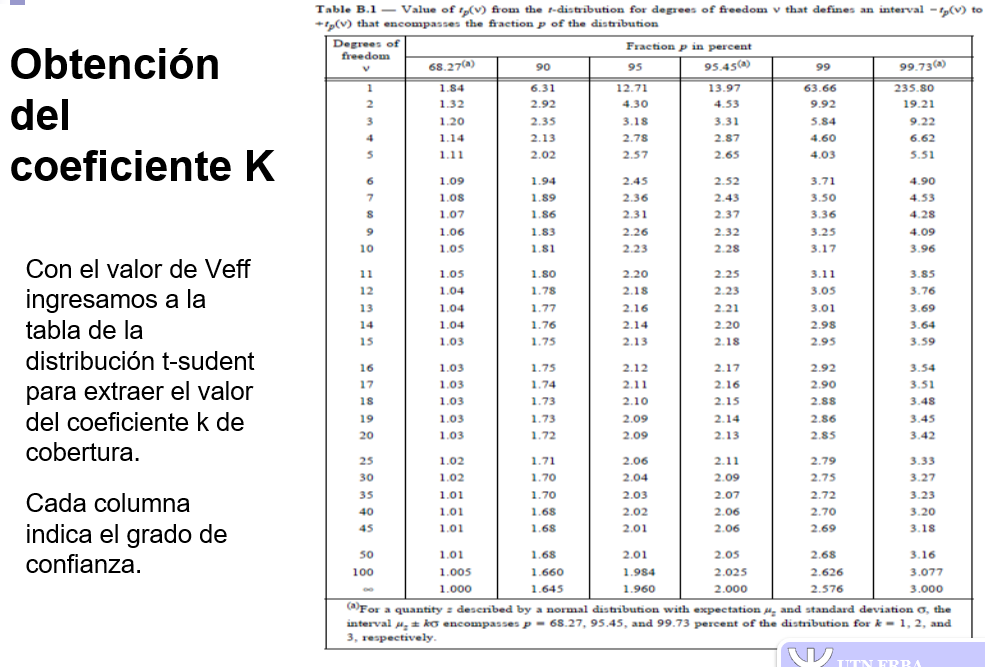